### Step 1 : Importing Necessary Libraries

In [2]:
# For data analysis and numerical functions
import pandas as pd
import numpy as np

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# For linear regression analysis (Train - test -Split, Scaling, Feature Selection, Modelling)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import statsmodels.api as sm

# For Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Loading Dataset and Understanding Data

In [4]:
df=pd.read_csv("day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [7]:
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee


#### Step 2.1 : Problem Statement & Data Dictionary:  

###### To model the demand for shared bikes with the available independent variables, which will be used by a US bike-sharing provider "BoomBikes" to understand how exactly the demands vary with different features. 

###### They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations and to understand the demand dynamics of a new market. 

 ###### 'Attribute' Information (in order):

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy  --> 'Good'
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  --> 'Moderate'
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  --> 'Bad'
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  --> 'Severe'
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 3 : Data Cleaning

### Step 3.1 : Missing Value Check

In [12]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [13]:
#There are no missing or null values
# In case of missing values we would need to impute them or process them during EDA

In [14]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [15]:
# renaming some columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)

In [16]:
# Copying the dataframe into new

bikeSharing_df = df.copy()

In [17]:
# dropping the duplicates

bikeSharing_df.drop_duplicates(inplace=True)

In [18]:
# checking the shape of new dataframe

bikeSharing_df.shape

(730, 16)

In [19]:
# As the shape is same as our original df after dropping duplicates i.e. [730 rows x 16 columns], that means there are no duplicates. (We already verified null values, so no need to check again)

### Step 3.2 : Dropping columns

###### dropping the unwanted columns

- `instant` is just a row instance identifier / index.
- `dteday` can be removed as we have date features like `month` and `year` and `weekday` already in other columns which can compensate. Also we will not consider day to day trend in demand for bikes for this analysis.
- `casual` and `registered` variables describe the target variable `count` as `count = casual + registered`.

In [22]:
# #Before dropping date, let us introduce a days_old feature which will indicates age of the business

# bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [23]:
# # Check dataframe
# bikeSharing_df.head()

In [24]:
# Droping instant column
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [25]:
# Check dataframe
bikeSharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [27]:
bikeSharing_df.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


- we can see that features like `season, month, weekday and  weathersit` are integers although they should be categorical variables, down the line we will be separating numericals and categorical columns.


### Step 3.3 : Handling missing values

###### We have already checked and found no missing values, however let us do a double check.

In [30]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

##### _`Inference`_: There are no null values.

### 3.4 Handling Outliers

In [33]:
bikeSharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [34]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

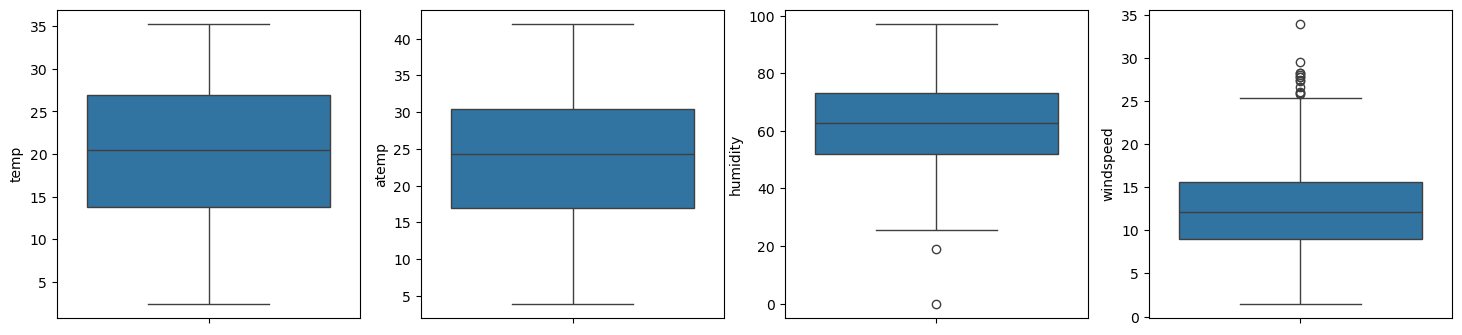

In [35]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

- From these plots, we can see there are no outliers to be handled.

## 4. EDA

#### 4.1 Convert season and  weathersit to categorical types

In [39]:
# Encoding/mapping the season column

bikeSharing_df.season = bikeSharing_df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [40]:
# Encoding/mapping the month column

bikeSharing_df.month = bikeSharing_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [41]:
# Encoding/mapping the weekday column

bikeSharing_df.weekday = bikeSharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [42]:
# Encoding/mapping the weathersit column

bikeSharing_df.weathersit = bikeSharing_df.weathersit.map({1:'Good',2:'Moderate',3:'Bad',4:'Severe'})

In [43]:
bikeSharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
# check the column info of the dataset

bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### 4.2 Visualising the Data

In [46]:
bikeSharing_df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


##### 4.2.1 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

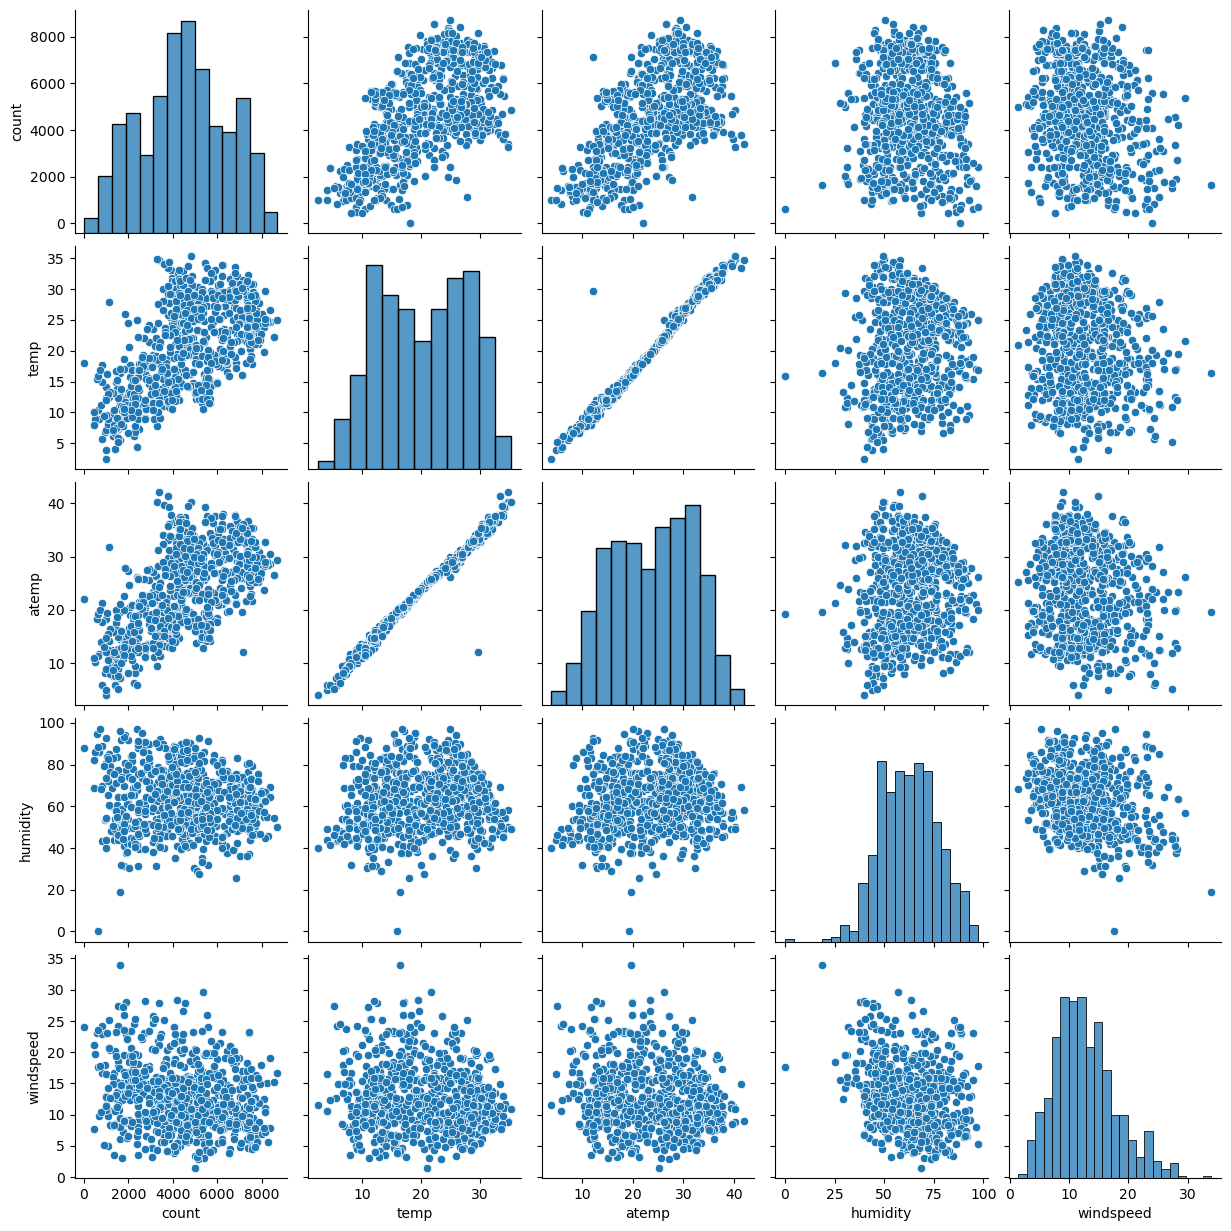

In [48]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['count', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

#### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable count
- Also temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

##### 4.2.2 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

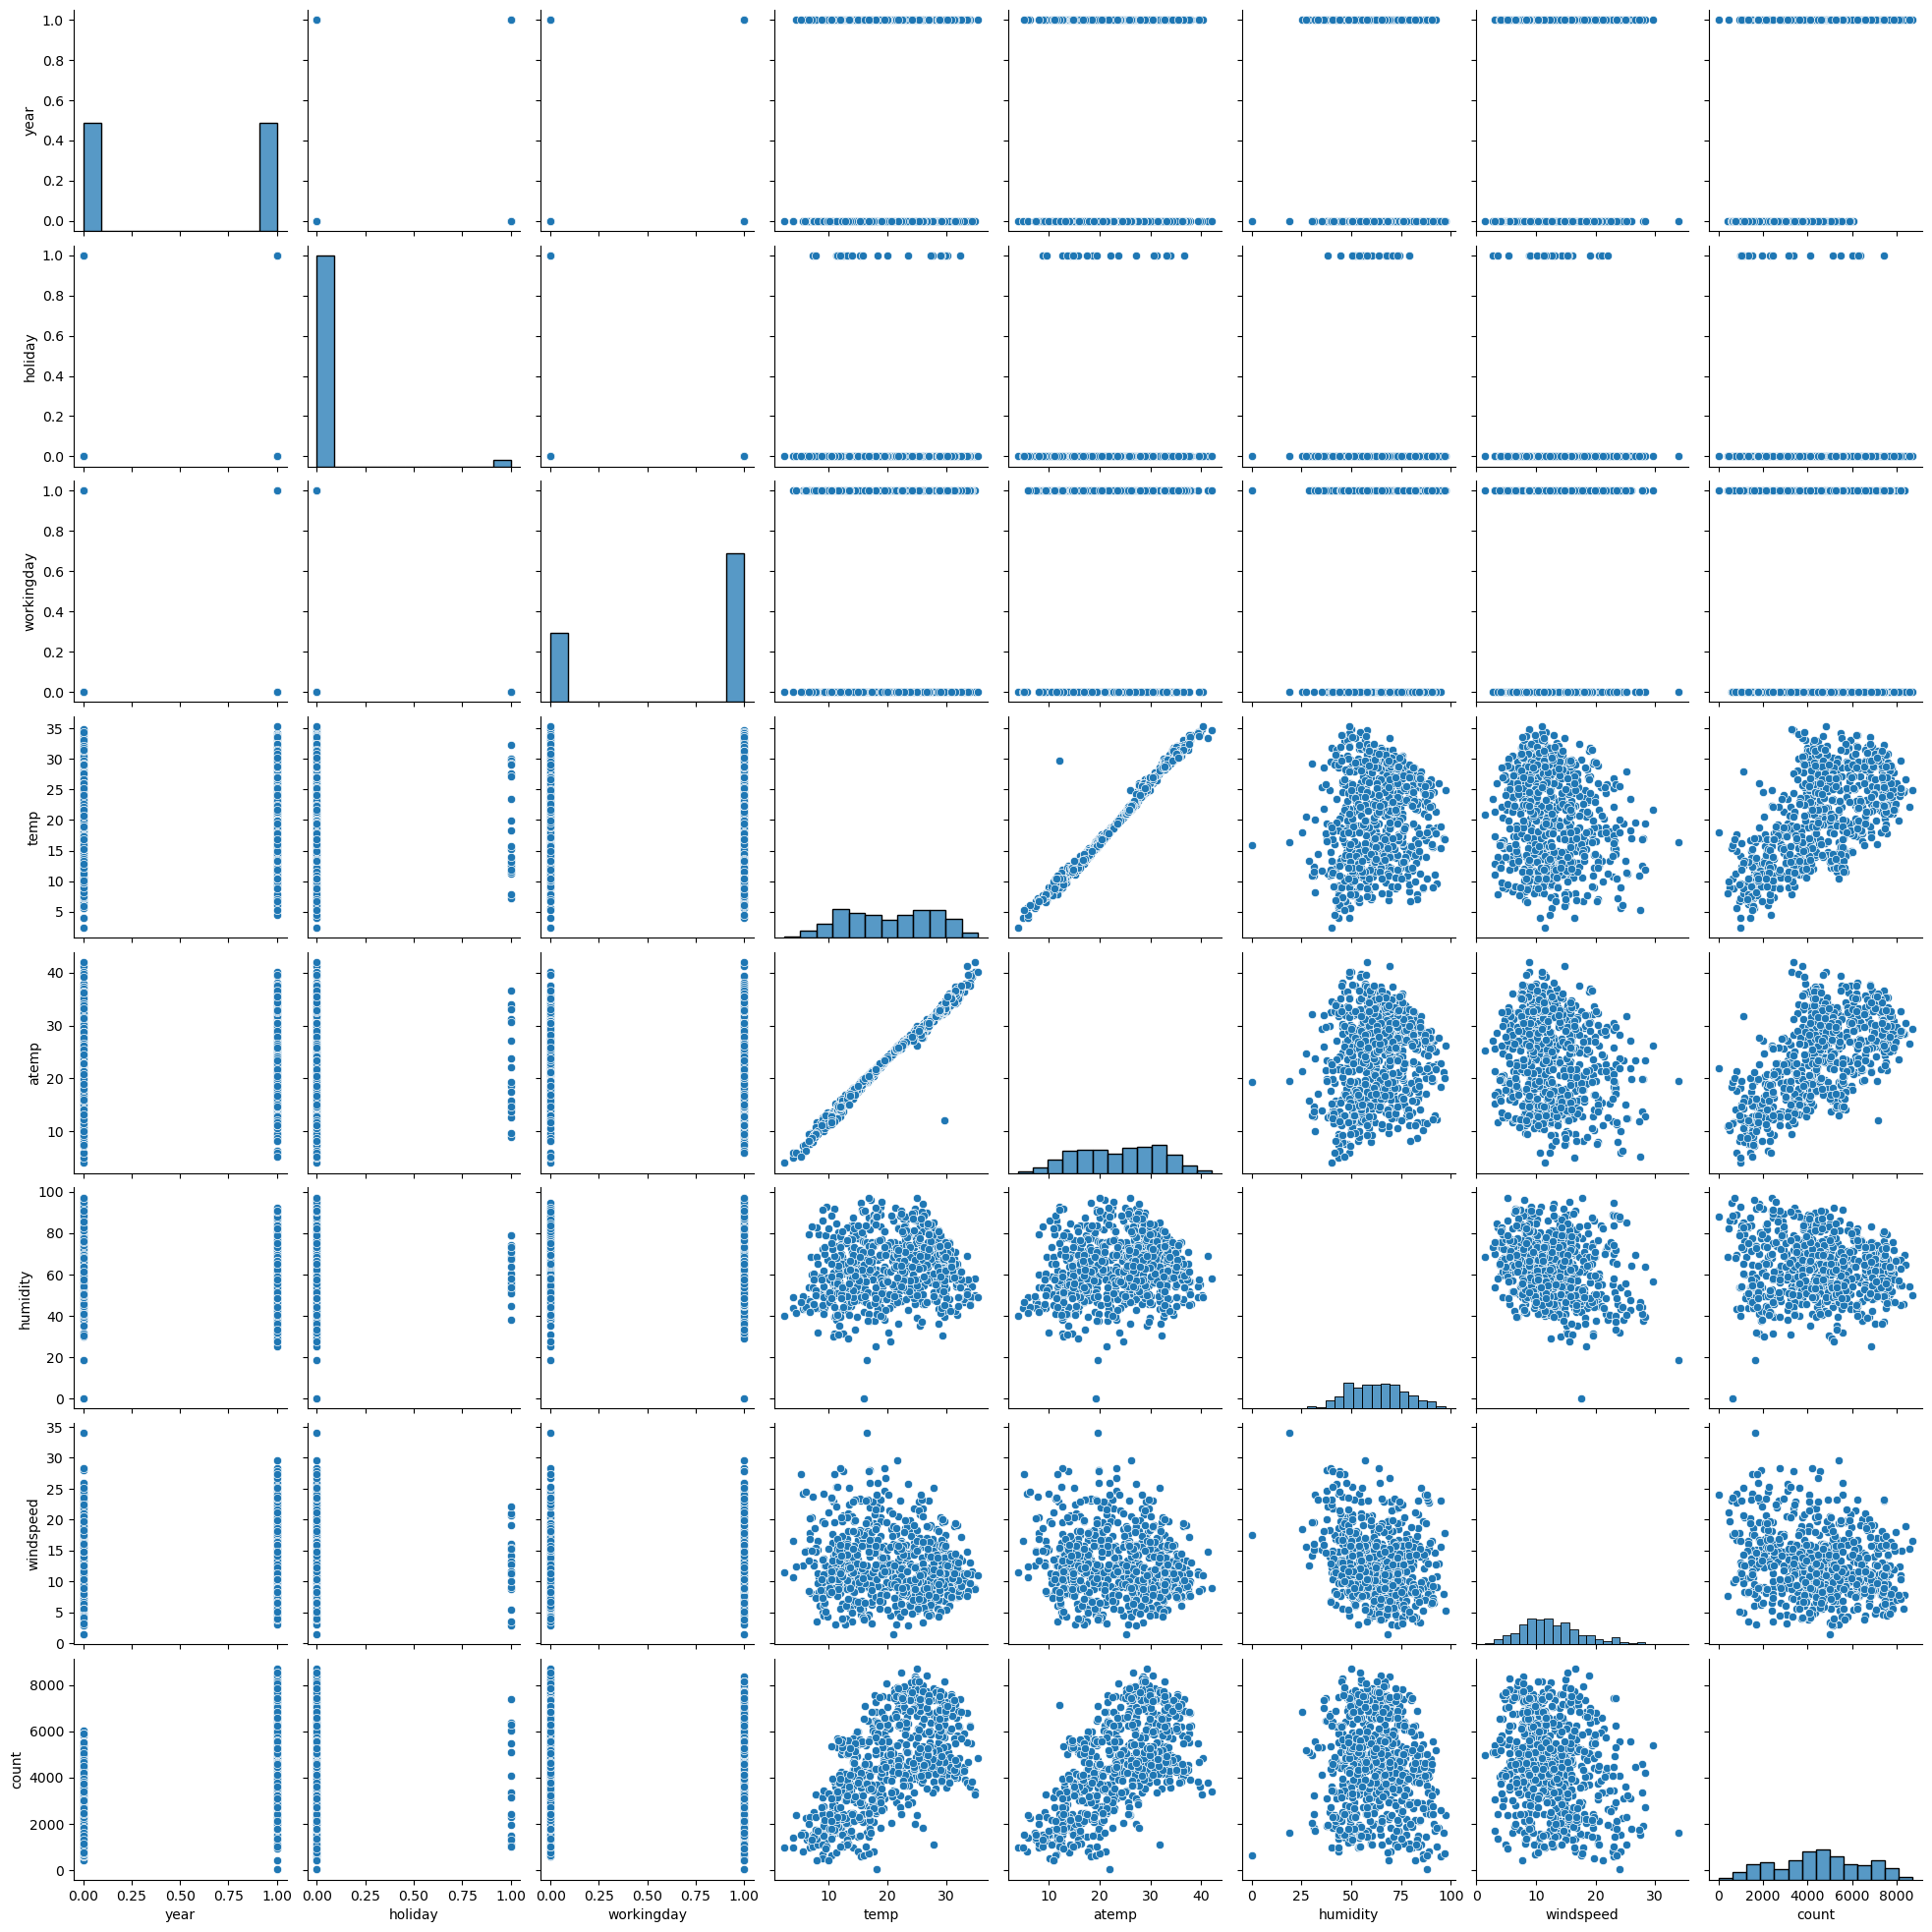

In [51]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

##### 4.2.3 Draw Heatmap of correlation between variables

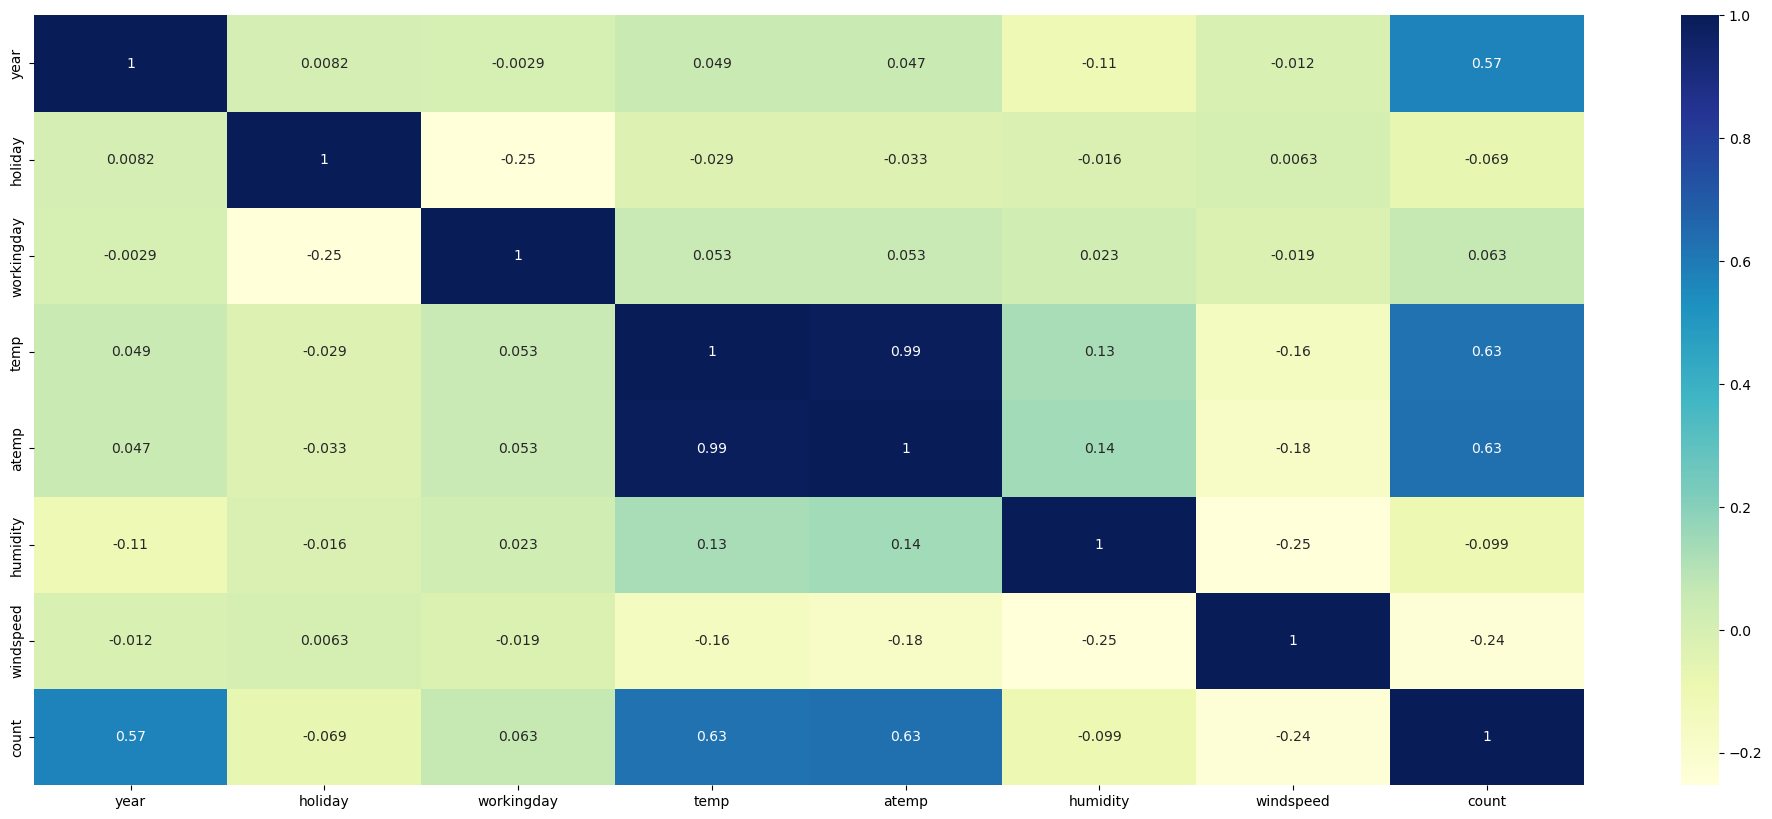

In [53]:
#Calculate Correlation
corr = bikeSharing_df[['year','holiday','workingday','temp','atemp','humidity','windspeed','count']].corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

- From the correlation map, temp, atemp seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

##### 4.2.4 Analysing Categorical Variabels with target variables 

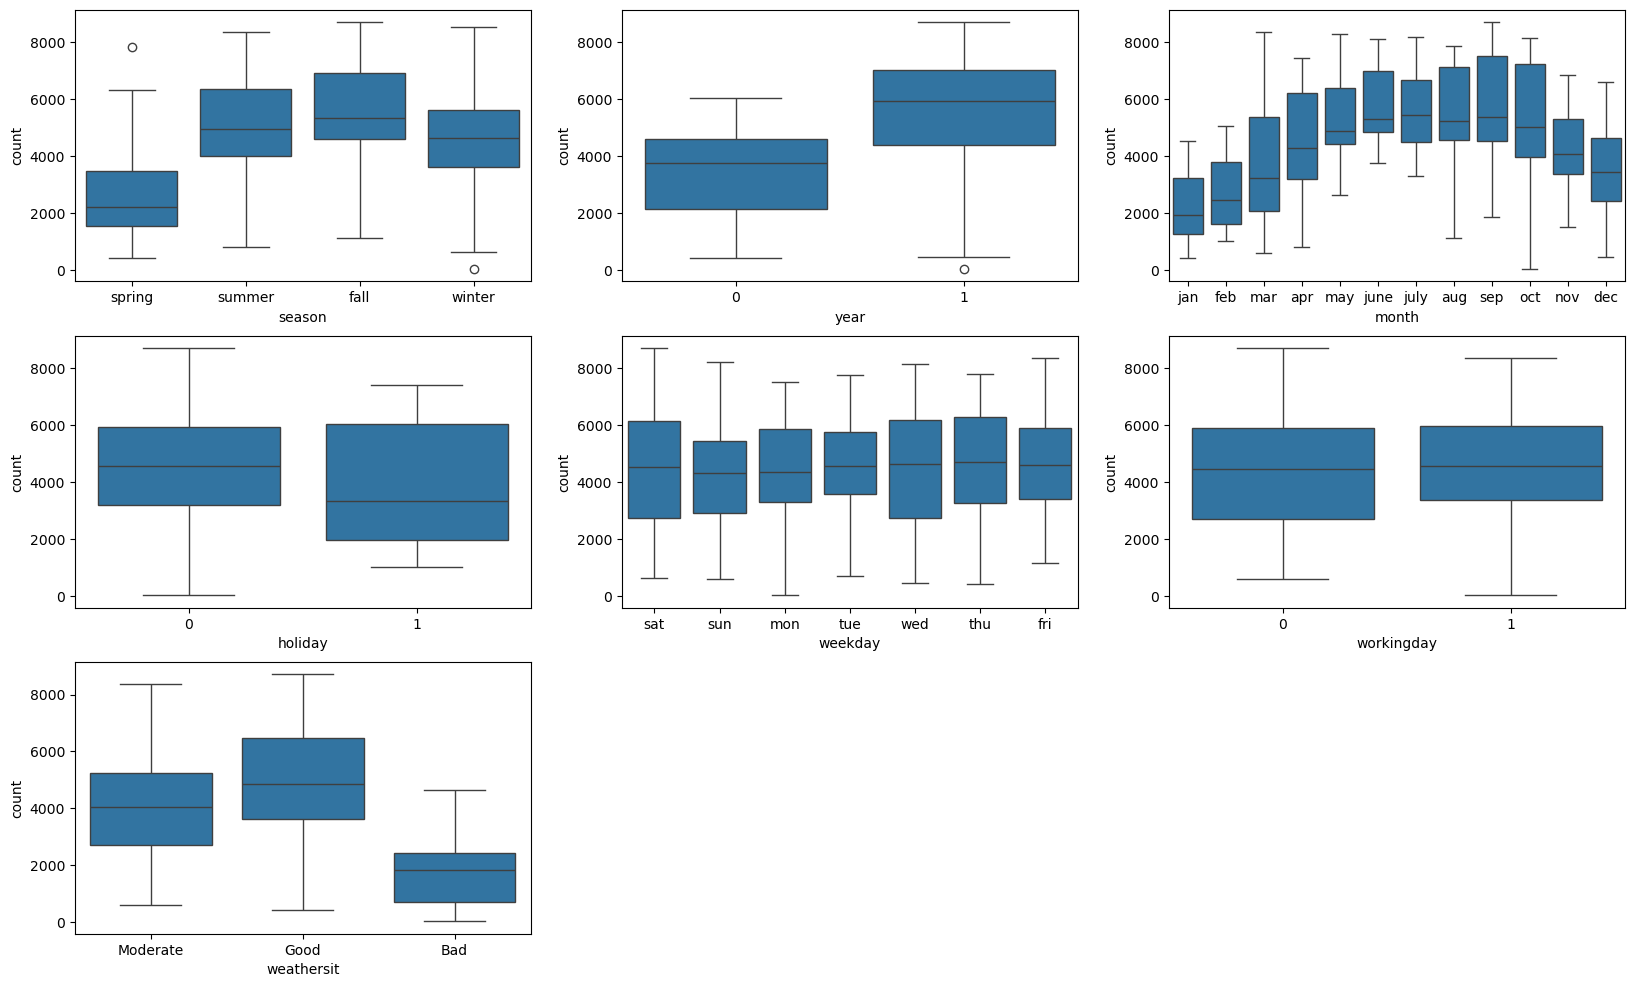

In [56]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='count')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: fall has highest demand for rental bikes
    2. Demand for 2019 has significantly grown from 2018
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The Good 'weathersit' has highest demand
    7. During September, bike sharing is more. During the year-end and beginning, it is less, which could be due to extereme weather conditions.
- ### Let us visualise each categorical variables individually to have a clear view.

In [58]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y = 'count', data = bikeSharing_df, palette='Set2')
    plt.subplot(1,2,2)
    sns.barplot(x = column,y = 'count', data = bikeSharing_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
plt.show()

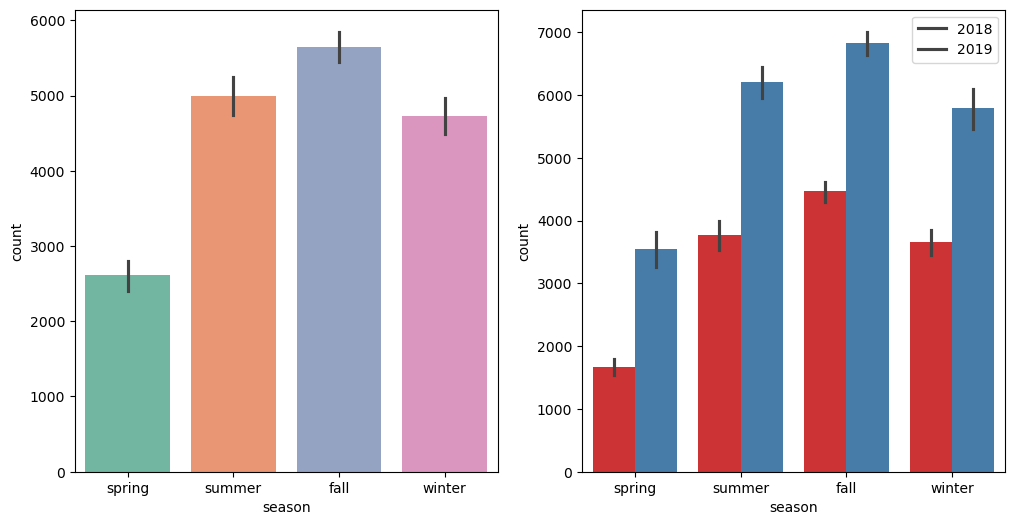

In [59]:
# plotting visualization for season column

plot_cat_columns('season')

- Inference: Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

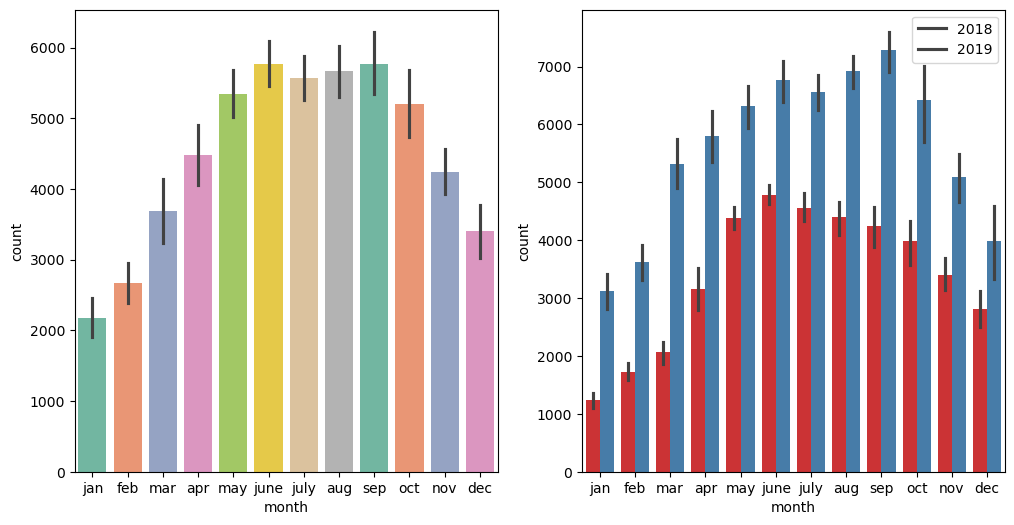

In [61]:
# plotting visualization for month column

plot_cat_columns('month')

- Most of the bookings has been done during the May - Oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased drastically from 2018 to 2019.

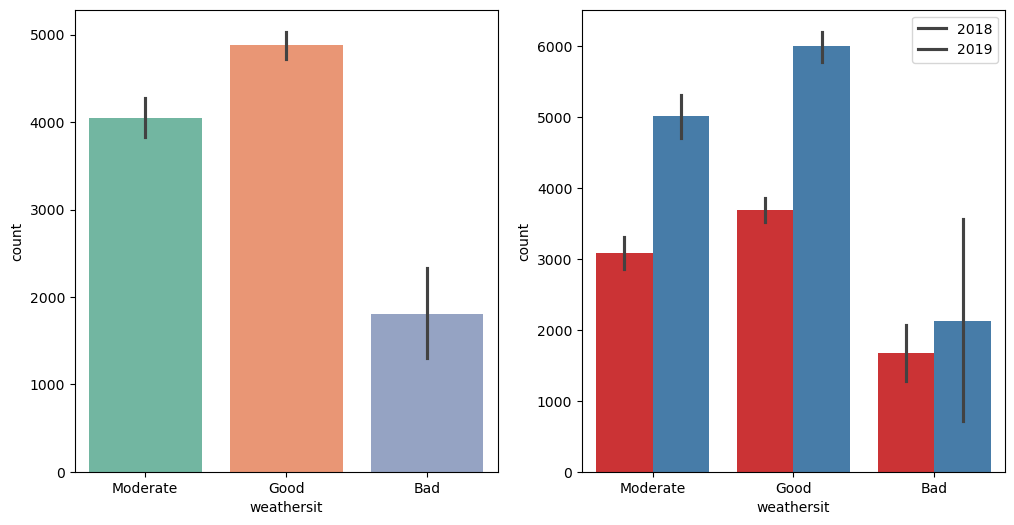

In [63]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

- Clear weather attracted more booking which seems obvious. In comparison to previous year, i.e 2018, booking increased for each weather in 2019.

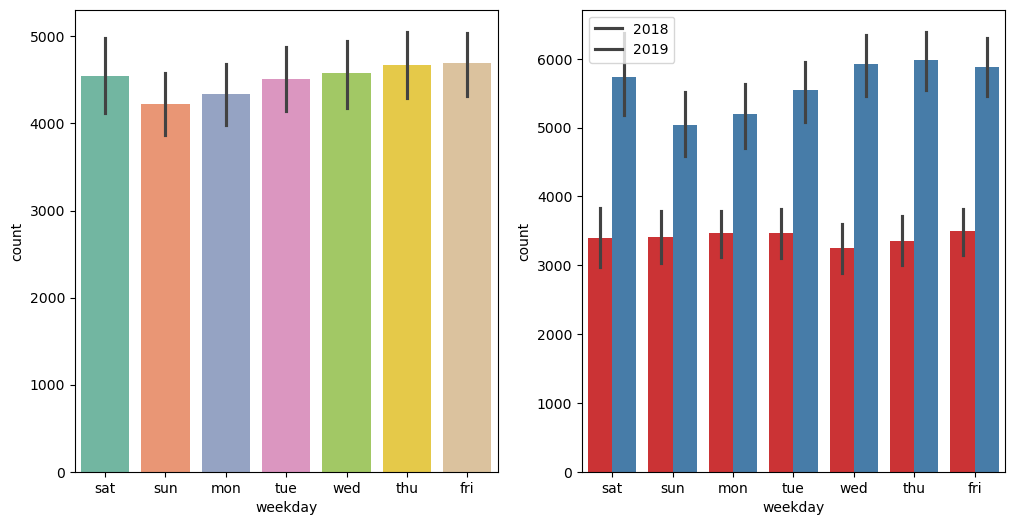

In [65]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

- Not a lot to decipher from number of bookings when compared to individual week days only apart from a slight more bookings on Saturdays, however bookings have significantly increased in 2019 from 2018.

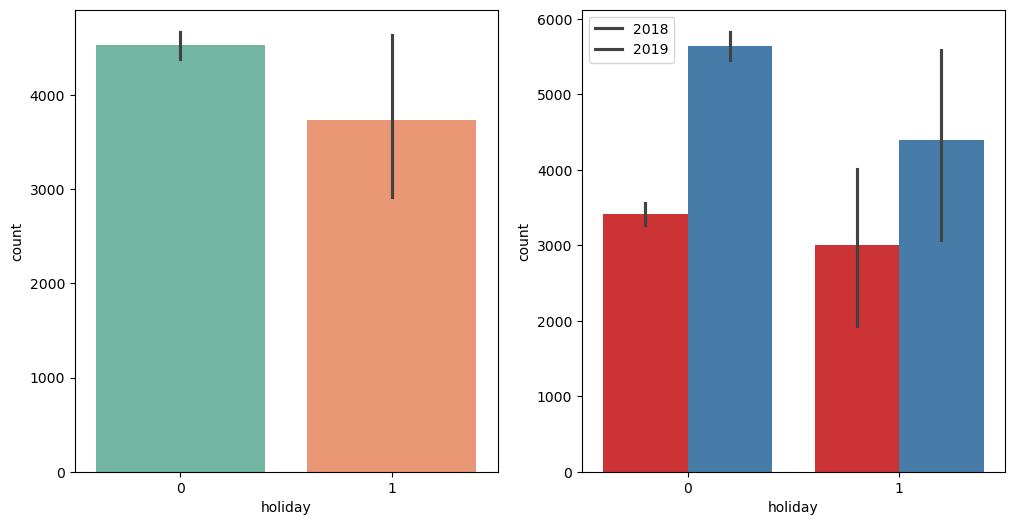

In [67]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

- When its holiday, booking demands seems to have decreased which seems reasonable as on holidays, people may want to spend time at home and enjoy with family & friends.

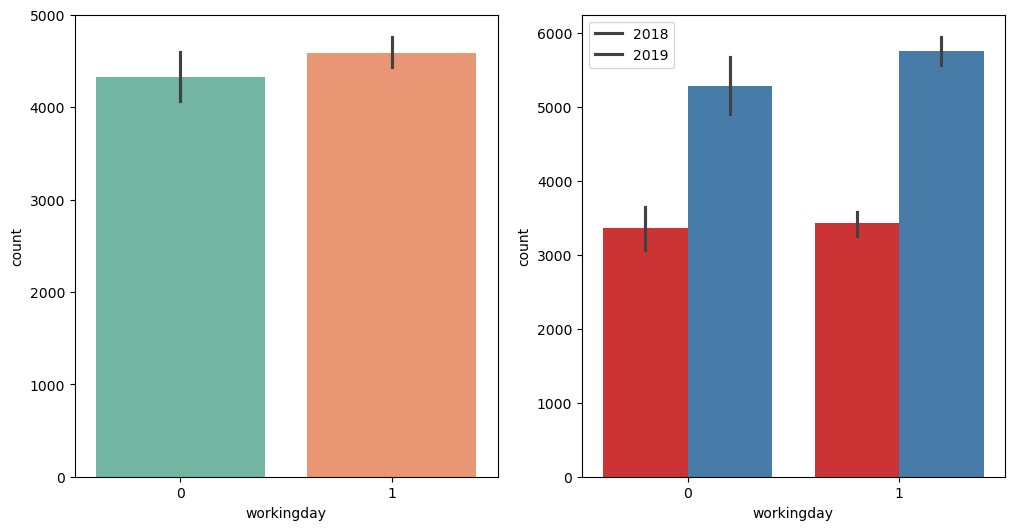

In [69]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

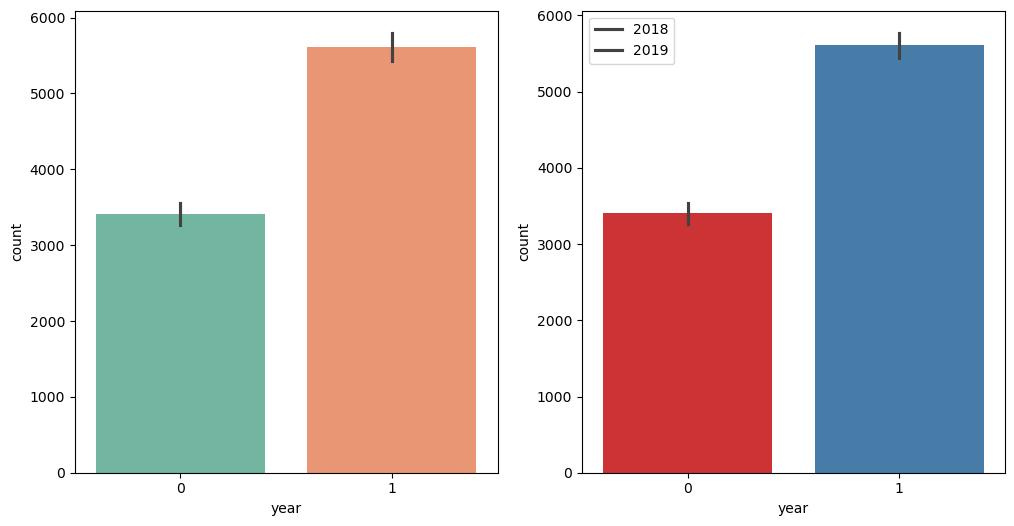

In [71]:
# plotting visualization for year column

plot_cat_columns('year')

- As we have seen all all of our previous plots , 2019 attracted more number of booking from the previous year 2018. This shows good progress in terms of business.

##### 4.2.5 Analysing Numerical Variabels with target variables 

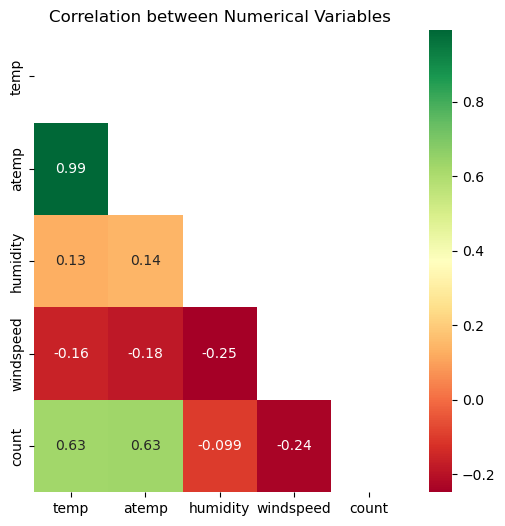

In [74]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

- #### As aparent from our heatmap the correlation between temp variable and windspeed and humidity , we will plot them individually to draw further insight

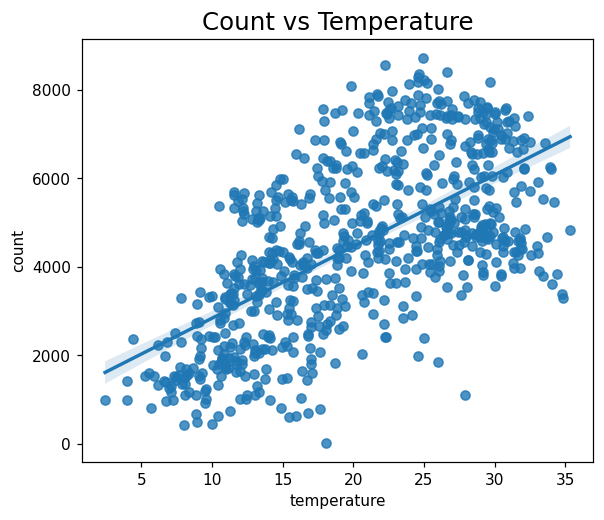

In [77]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Temperature",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="temp")
plt.xlabel("temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that count is linearly increasing with temp indicating linear relation.

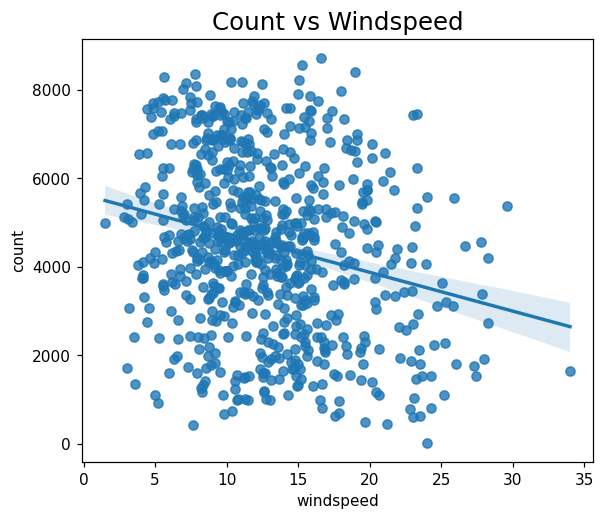

In [79]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed values are more scattered around.
- We can see count decreasing with increase in windspeed.

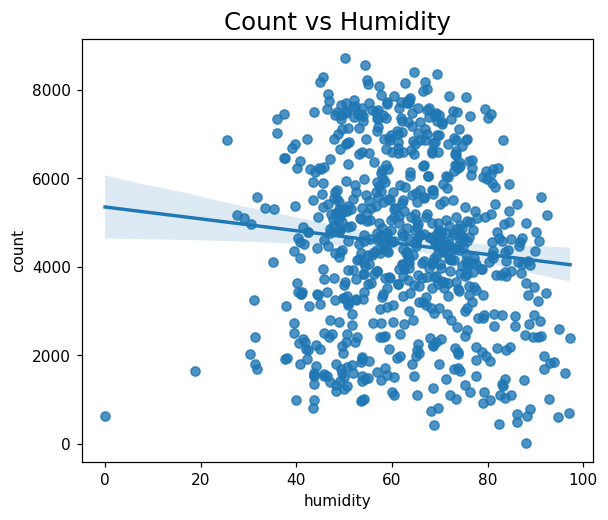

In [81]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="humidity")
plt.show()

#### _`Inference`_:
- Humidity values are more scattered around.
- We can see count decreasing with increase in humidity.

## 5. Data Preparation for Linear Regression

#### Create dummy variables for categorical variables

In [85]:
# Dummy variable creation for month, weekday, weathersit and season variables.

bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","month","weekday"], dtype=int, drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"], dtype=int,)


- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [87]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [88]:
#Print few rows to inspect
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [89]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   count                730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  month_aug            730 non-null    int32  
 12  month_dec            730 non-null    int32  
 13  month_feb            730 non-null    int32  
 14  month_jan            730 non-null    int32  
 15  month_july           730 non-null    int

In [90]:
bikeSharing_df.shape

(730, 31)

## 6. Model Building 
### 6.1 Splitting the Data into Training and Testing Sets

In [92]:
#y to contain only target variable
y=bikeSharing_df.pop('count')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [93]:
#Inspect independent variables
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [94]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 6.2 Feature Scaling continuous variables

- To make all features in same scale to interpret easily, continous variable columns 'temp', 'humidity' & 'windspeed' are to be scaled.

In [97]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [98]:
#Inspect stats fro Training set after scaling
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### 6.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [101]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [103]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 4),
 ('month_dec', False, 8),
 ('month_feb', False, 7),
 ('month_jan', False, 3),
 ('month_july', True, 1),
 ('month_june', False, 15),
 ('month_mar', False, 16),
 ('month_may', False, 5),
 ('month_nov', False, 14),
 ('month_oct', False, 2),
 ('month_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

### 6.4 Manual elimination

In [105]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')


In [106]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

##### Function to build a model using statsmodel api

In [108]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [110]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif 

In [111]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']]

In [112]:
X_train_rfe.shape

(511, 15)

## 7. Build Model

#### 7.1 Model 1 - Start with all variables selected by RFE

In [115]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weekday_sat', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.50e-191
Time:                        18:57:55   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.1618    

,Features,VIF
4,humidity,25.64
3,temp,22.87
13,weathersit_Good,14.84
14,weathersit_Moderate,9.07
6,season_spring,5.69
2,workingday,5.43
5,windspeed,4.69
8,season_winter,4.14
7,season_summer,3.21
0,year,2.10


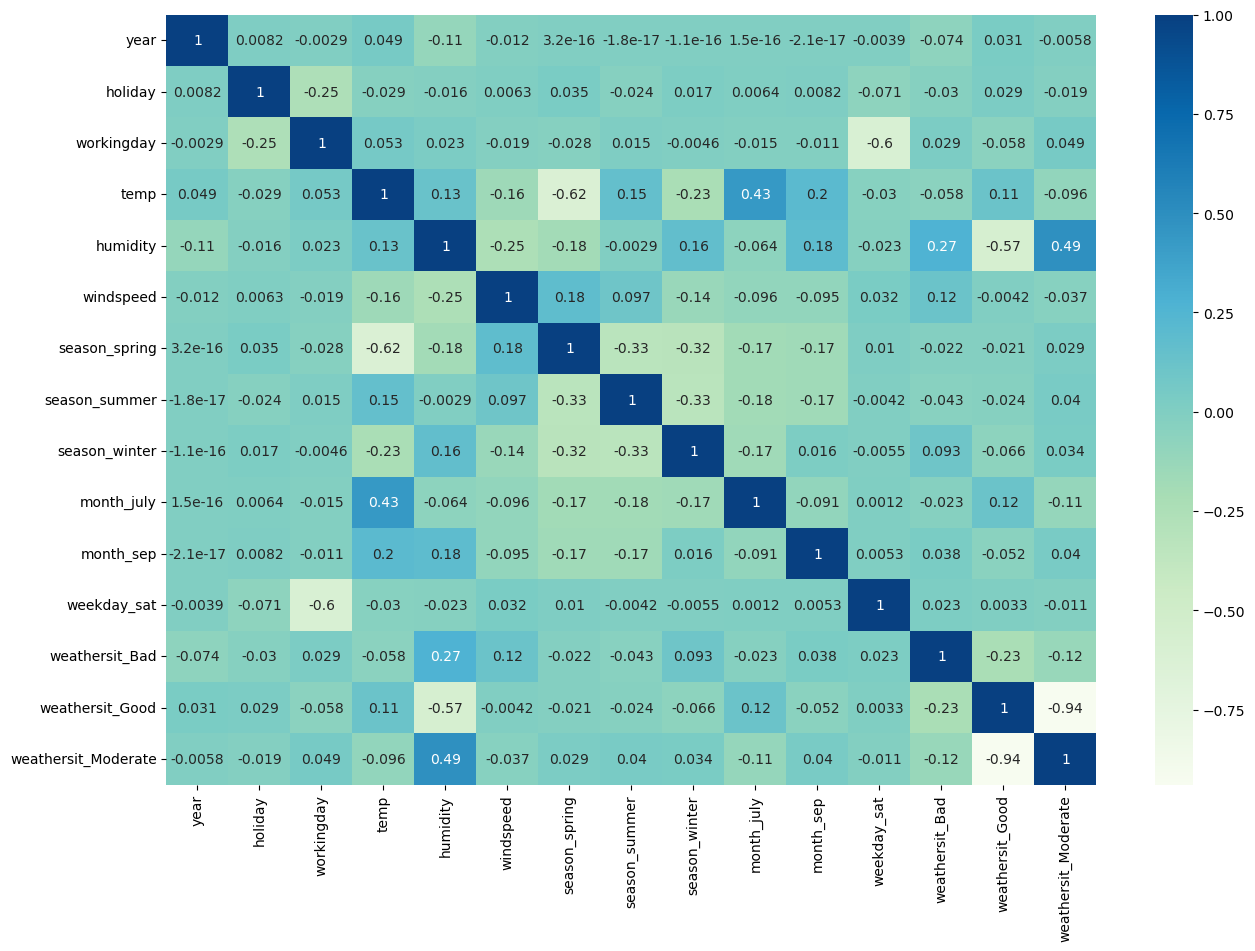

In [116]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2

In [118]:
# Dropping weathersit_Good as it has high VIF 

cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad',
       'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.31e-192
Time:                        18:57:56   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2105.3594    

,Features,VIF
4,humidity,28.48
3,temp,17.00
2,workingday,5.30
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.44
7,season_summer,2.85
13,weathersit_Moderate,2.28
0,year,2.09
11,weekday_sat,1.97


#### Model 3

In [120]:
# As humidity shows high VIF values hence we can drop it
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad',
       'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.84e-189
Time:                        18:57:56   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1382.9821    

,Features,VIF
3,temp,6.98
2,workingday,5.22
4,windspeed,4.66
5,season_spring,2.49
6,season_summer,2.34
0,year,2.07
7,season_winter,1.99
10,weekday_sat,1.96
8,month_july,1.58
12,weathersit_Moderate,1.57


#### Model 4

In [122]:
# Dropping workingday as it has high VIF
cols = ['year', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.37e-187
Time:                        18:57:57   Log-Likelihood:                -4134.3
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1720.0299    

,Features,VIF
2,temp,5.13
3,windspeed,4.63
5,season_summer,2.23
4,season_spring,2.10
0,year,2.07
6,season_winter,1.80
7,month_july,1.58
11,weathersit_Moderate,1.55
8,month_sep,1.34
9,weekday_sat,1.19


#### Model 5

In [124]:
# Dropping month_july as it has negative coefficient and is insignificant as it has high P-value
cols =  ['year', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weekday_sat', 'weathersit_Bad',
       'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.48e-186
Time:                        18:57:57   Log-Likelihood:                -4138.3
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1645.0887    

,Features,VIF
3,windspeed,4.62
2,temp,3.88
0,year,2.07
4,season_spring,2.01
5,season_summer,1.90
6,season_winter,1.65
10,weathersit_Moderate,1.55
7,month_sep,1.23
8,weekday_sat,1.19
9,weathersit_Bad,1.08


#### Model 6

In [126]:
# Dropping 'weekday_sat' as it has high P-value
cols =  ['year', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weathersit_Bad',
       'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.20e-187
Time:                        18:57:57   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1674.8338    

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_Moderate,1.55
7,month_sep,1.23
8,weathersit_Bad,1.08
1,holiday,1.04


- VIF value now seems to be good as it's below 5.

#### Model 6

In [129]:
# Dropping 'windspeed' as it has high VIF and negative coefficient
cols =  ['year', 'holiday', 'temp',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weathersit_Bad',
       'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.26e-181
Time:                        18:57:57   Log-Likelihood:                -4156.7
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1245.2813    

,Features,VIF
2,temp,2.90
0,year,2.07
4,season_summer,1.63
8,weathersit_Moderate,1.55
5,season_winter,1.43
3,season_spring,1.33
6,month_sep,1.23
7,weathersit_Bad,1.07
1,holiday,1.04


##### `_Inference`_
- Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821 
Let us select this Model as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear (high VIF) variables.
- Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [131]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [132]:
#Let us build the finalmodel using sklearn
cols = ['year', 'holiday', 'temp',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weathersit_Bad',
       'weathersit_Moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1245.281283954721 [ 2031.326427    -865.7426348   4261.75561421  -559.61540602
   456.05551627   844.41637463   827.82278906 -2611.89767159
  -673.53483592]


## 8. Model Evaluation

#### 8.1 Residual Analysis

In [135]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

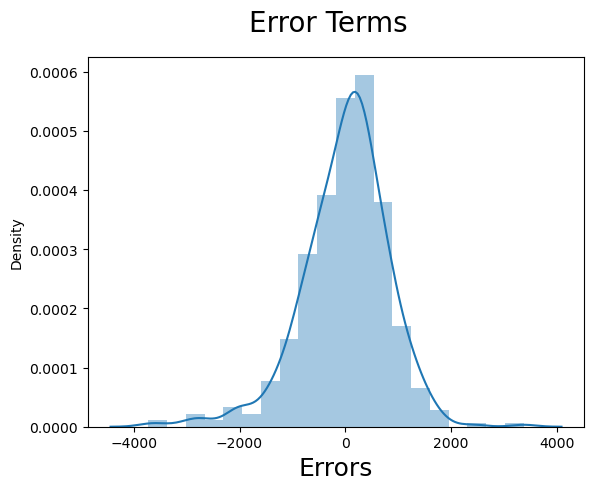

In [136]:
#Plot a histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

- Error terms are following normal distribution

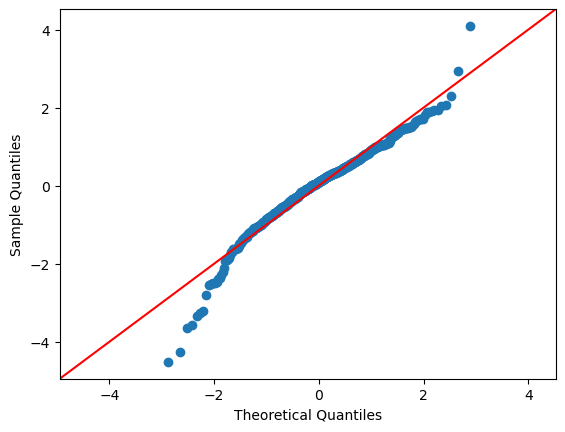

In [138]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

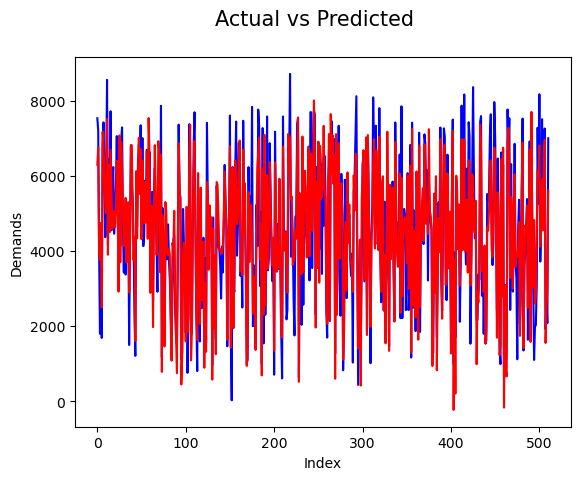

In [139]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- ##### Actual and Predicted result following almost the same pattern so this model seems ok

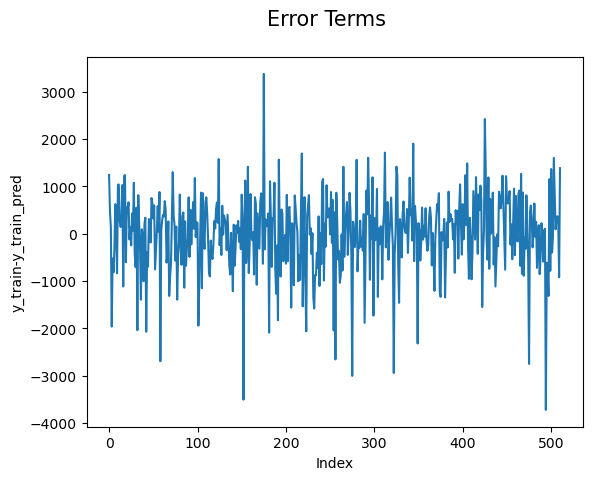

In [141]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

- ##### Here, we see the error terms are independent of each other.

In [143]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8212699938693997

##### _`Inference`_
- ##### R2 is same as we obtained for our final model

#### 8.2 Multicollinearity Check

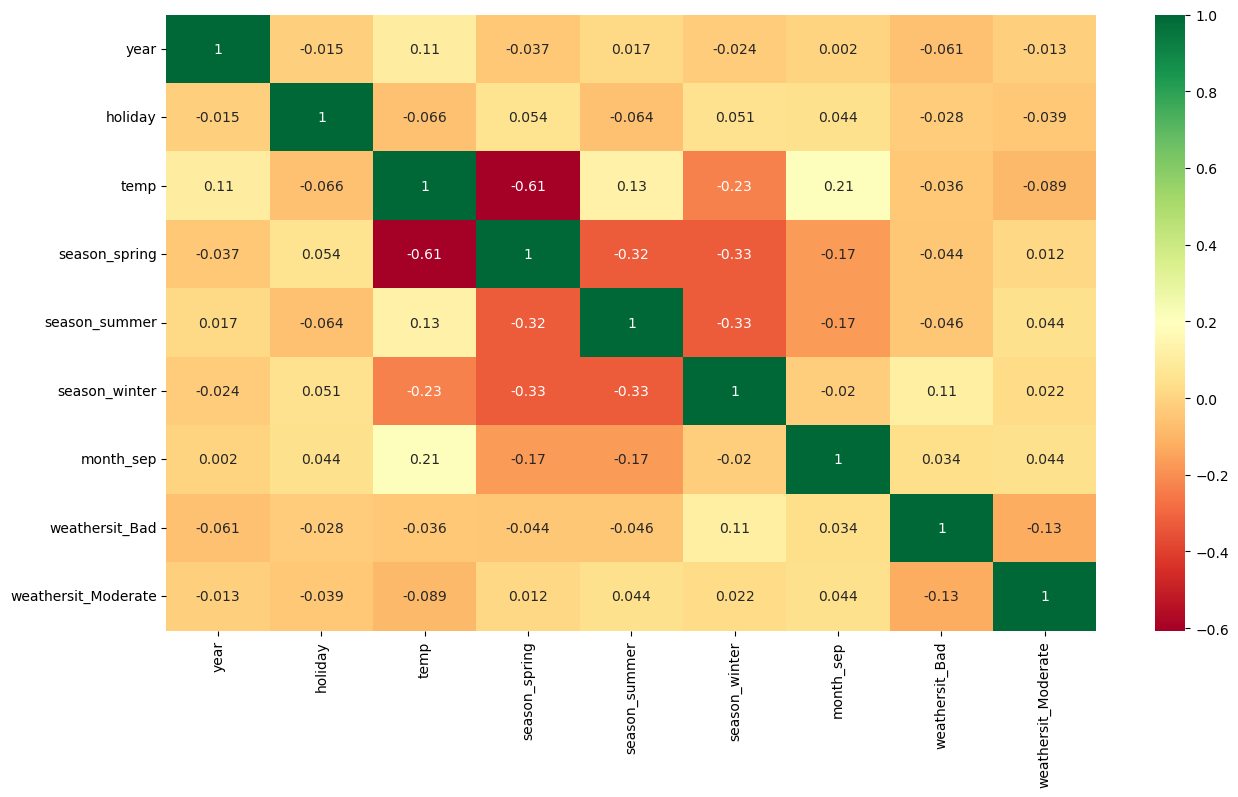

In [146]:
# Multicollinearity 

plt.figure(figsize=(15,8))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="RdYlGn")
plt.show()

- There is no multicollinearity  as seen from the heatmap.

#### 8.3 Linearity Check

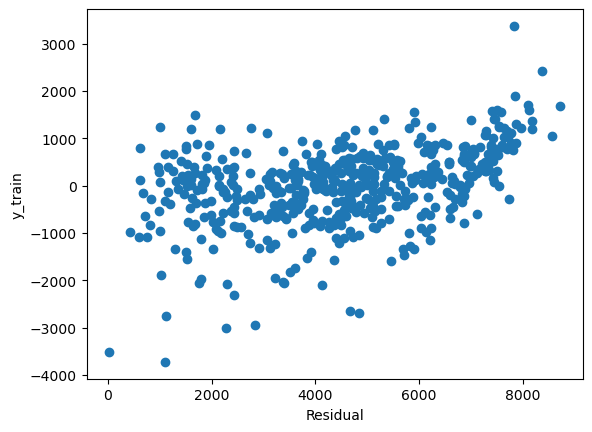

In [149]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### 8.4 Predict values for test data set

In [151]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [152]:
#Columns from our final model
cols = ['year', 'holiday', 'temp',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weathersit_Bad',
       'weathersit_Moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

##### 8.5 R-Squared value for test predictions

In [154]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.808980636769386

In [155]:
print('The R-Square of Final Model on Train Dataset is:- ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is:-  ',round(r2_score(y_test,y_test_pred),4))

The R-Square of Final Model on Train Dataset is:-  0.8213
The R-Square of Final Model on Test Dataset is:-   0.809


##### _`Inference`_ 
R2 value for predictions on test data (0.809) is almost same as R2 value of train data(0.821). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

#### 8.6 Homoscedasticity 

Text(0, 0.5, 'y_test_pred')

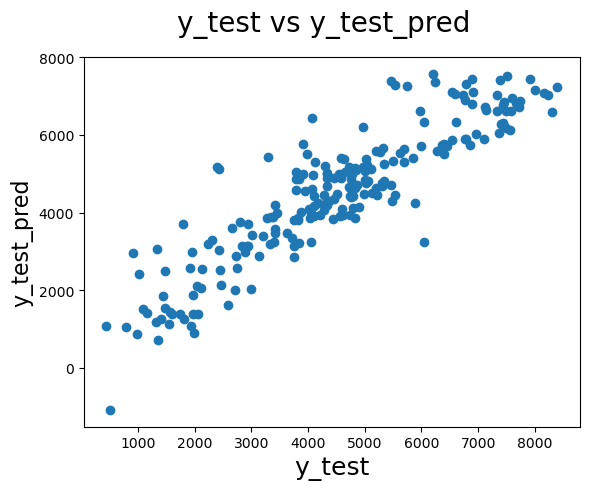

In [158]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#####  _`Inference`_
 We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

#### 8.7 Plot Test vs Predicted test values

In [161]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

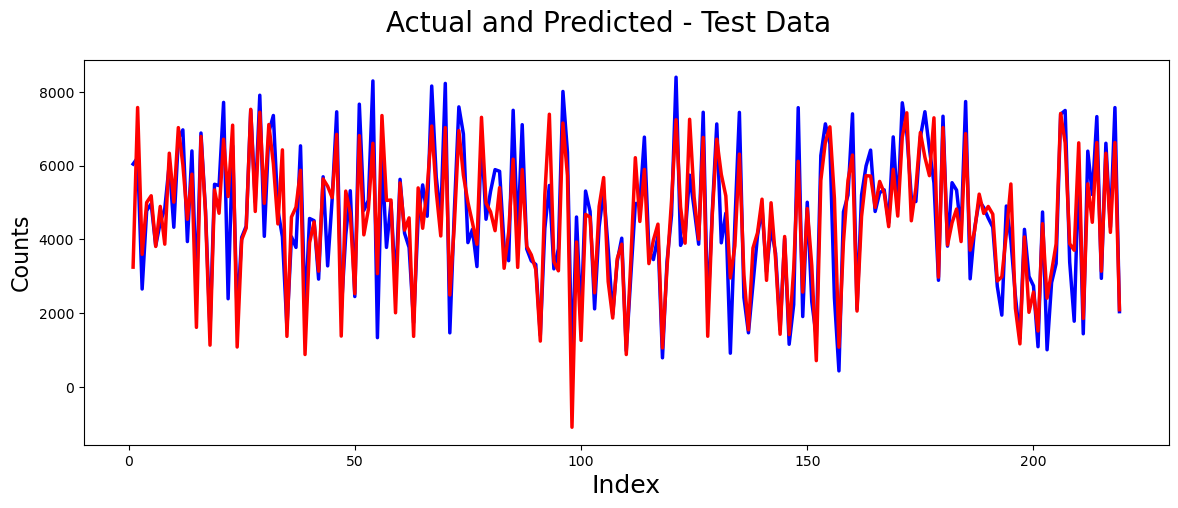

In [162]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is very close to actuals

#### 8.8 Plot Error Terms for test data

In [165]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

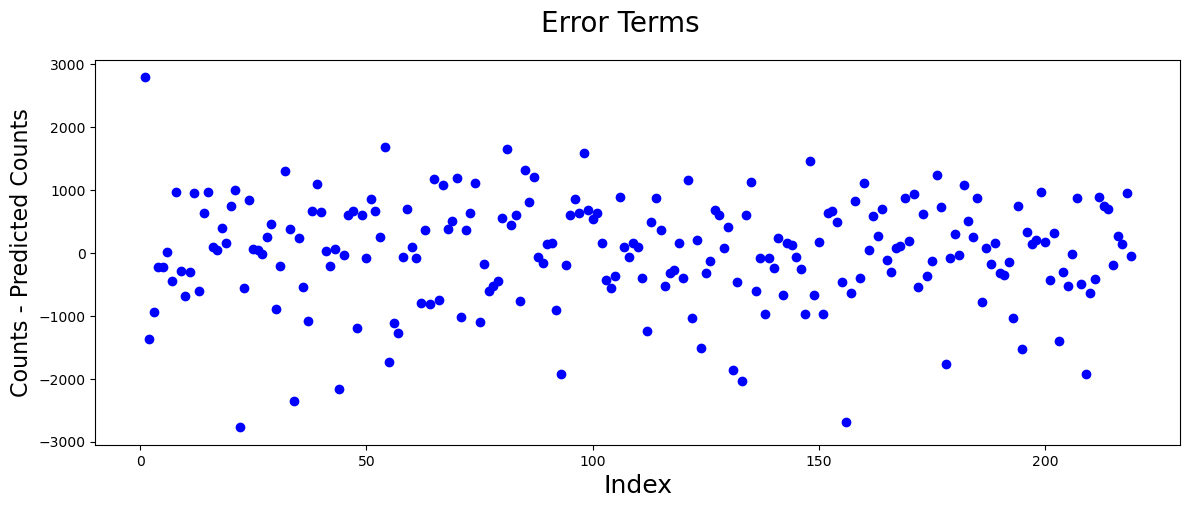

In [166]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### _`Inference`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 9. Making Predictions using the Final Model

- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [170]:
# Checking data before scaling
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [171]:
bikeSharing_df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,0.246575,0.252055,0.243836,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,0.431313,0.434490,0.429689,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 9.1 Intrepretting the Model

- Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [174]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['year', 'holiday', 'temp',
       'season_spring', 'season_summer', 'season_winter',
       'month_sep', 'weathersit_Bad',
       'weathersit_Moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.26e-181
Time:                        18:58:03   Log-Likelihood:                -4156.7
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1245.2813    

### Interepretation of results

- ### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users as we had a significant increase from 2018 to 2019. The low numbers due to pandemic might be short lived.
- There would be less bookings during moderate or bad weather i.e. Light Snow or Rain, so Company could probably use this time to service the bikes without having business impact.
- Hence when the situation comes back to normal after pandemic, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`Conclusion`_
Demand of bikes depend on year, holiday, temp, sep month, Light_snowrain, Misty, and spring, summer and winter seasons.